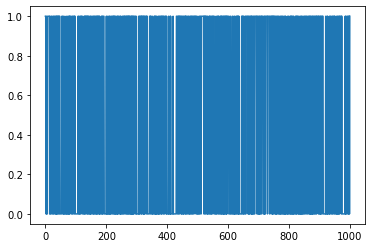

In [62]:
from torch import nn
from torch.nn import functional as F
import torch
import networkx as nx
import dgl
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
from copy import deepcopy
from dgl import ops as Fops
from torch import distributions as dist


def clones(net, N):
    return [deepcopy(net) for _ in range(N)]
    
   
class MultiHeadAttention(nn.Module):
    
    def __init__(self, dim_model, h):
        super().__init__()
        assert dim_model % h == 0
        self.h = h
        self.dim_model = dim_model
        self.d_k = dim_model // h
        self.linears  = clones(nn.Linear(dim_model, dim_model), 4)
        self.attn = None
    
    def _view_head(self, x):
        return x.view(x.size(0), -1, self.h, self.d_k).transpose(1, 2)
        
    def forward(self, g, query, key, value):
        q = self._view_head(self.linears[0](query))
        k = self._view_head(self.linears[1](key))
        v = self._view_head(self.linears[2](value))
        x = Fops.v_dot_u(g, q, k) / self.d_k**0.5
        score = Fops.edge_softmax(g, x)
#         score = Fops.v_dot_u(g, q, k) / self.d_k**0.5
#         score = F.leaky_relu(Fops.v_dot_u(g, q, k) / self.d_k**0.5)
        out = Fops.u_mul_e_sum(g, v, score)
        out = out.transpose(1, 2).view(g.number_of_nodes(), self.h * self.d_k)
        score = score.view(score.size(0), self.h, -1)
        self.attn = score
        out = self.linears[3](out)
        return out
    

g = dgl.graph(([], []))
g.add_edges([0, 1], [2, 3])

g.ndata['x'] = torch.arange(g.number_of_nodes())

src_embed = nn.Embedding(10, 16)
dst_embed = nn.Embedding(10, 16)
encoder = nn.Sequential(
    nn.Linear(2, 16),
    nn.LeakyReLU()
)
decoder = nn.Sequential(
    nn.Linear(16, 2),
    nn.LeakyReLU()
)
src = src_embed(g.ndata['x'])
dst = dst_embed(g.ndata['x'])


attn = MultiHeadAttention(16, 16)
h = dist.Bernoulli(0.5).sample((g.number_of_nodes(), 2))

results = []
for i in range():
    results.append(h)
    h = encoder(h)
    h = attn(g, src, dst, h)
    h = decoder(h)
    h = F.gumbel_softmax(logits=h, hard=False)

    
plt.plot(torch.stack(results).argmax(-1).T[0]);

In [44]:
torch.stack(results).argmax(-1)

tensor([[0, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 1],
        [1, 1, 1, 1],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 0],
        [1, 1, 1, 0],
        [0, 1, 1, 1],
        [1, 0, 1, 0],
        [1, 1, 0, 1],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [1, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 1, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [1, 1, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 0, 0, 0],
        [1, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 0, 1],
        [1, 1, 1, 0],
        [1, 1, 0, 0],
        [1, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 0],
        [0, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 1, 0, 0],
        [0